In [5]:
import numpy as np
import pandas as pd

In [6]:
pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.1-py3-none-any.whl size=21133 sha256=fbf780a8a133c0c303245efb74c1da921f48a0b53feaedda7f7d0b925f66c29f
  Stored in directory: /root/.cache/pip/wheels/9b/d9/5f/36a39fd10d15b5b2d362ad6dc8a1bd28a3b1e14e08357944bf
Successfully built multiurl
Note: you may need to restart the kernel to use updated packages.


In [7]:
config_content = """
url: https://cds.climate.copernicus.eu/api/v2
key: 309401:e69fa1e0-e15f-42c5-9199-e2b8416c64a4
"""

# Define the file path
file_path = '/root/.cdsapirc'

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(config_content)

print("Configuration file created and saved successfully.")


Configuration file created and saved successfully.


In [8]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '2m_temperature', 'cloud_base_height', 'high_cloud_cover',
            'low_cloud_cover', 'mean_sea_level_pressure', 'medium_cloud_cover',
            'surface_latent_heat_flux', 'surface_pressure', 'surface_sensible_heat_flux',
            'total_cloud_cover', 'total_column_cloud_ice_water', 'total_column_cloud_liquid_water',
            'total_precipitation',
        ],
        'year': '2013',
        'month': '06',
        'day': [
            '15', '16', '17',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            31.4, 77.2, 28.8,
            81.2,
        ],
    },
    'download.nc')

2024-05-17 11:01:01,523 INFO Welcome to the CDS
2024-05-17 11:01:01,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-17 11:01:01,666 INFO Request is completed
2024-05-17 11:01:01,668 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1715859102.2838843-24687-12-1af90bbc-baed-48ed-b037-270163e0bfec.nc to download.nc (346.4K)
2024-05-17 11:01:01,930 INFO Download rate 1.3M/s 


Result(content_length=354752,content_type=application/x-netcdf,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1715859102.2838843-24687-12-1af90bbc-baed-48ed-b037-270163e0bfec.nc)

In [9]:
!ls

download.nc


In [10]:
!pip install netCDF4

In [49]:
import xarray as xr

nc_file = 'download.nc'
dataset = xr.open_dataset(nc_file)

# metadata
print(dataset)

<xarray.Dataset> Size: 1MB
Dimensions:    (longitude: 17, latitude: 11, time: 72)
Coordinates:
  * longitude  (longitude) float32 68B 77.2 77.45 77.7 77.95 ... 80.7 80.95 81.2
  * latitude   (latitude) float32 44B 31.3 31.05 30.8 30.55 ... 29.3 29.05 28.8
  * time       (time) datetime64[ns] 576B 2013-06-15 ... 2013-06-17T23:00:00
Data variables: (12/13)
    t2m        (time, latitude, longitude) float64 108kB ...
    cbh        (time, latitude, longitude) float64 108kB ...
    hcc        (time, latitude, longitude) float64 108kB ...
    lcc        (time, latitude, longitude) float64 108kB ...
    msl        (time, latitude, longitude) float64 108kB ...
    mcc        (time, latitude, longitude) float64 108kB ...
    ...         ...
    sp         (time, latitude, longitude) float64 108kB ...
    sshf       (time, latitude, longitude) float64 108kB ...
    tcc        (time, latitude, longitude) float64 108kB ...
    tciw       (time, latitude, longitude) float64 108kB ...
    tclw     

In [50]:
data_vars = dataset.data_vars
num_variables = len(data_vars)
print("Number of variables:", num_variables)
data_vars

Number of variables: 13


Data variables:
    t2m      (time, latitude, longitude) float64 108kB ...
    cbh      (time, latitude, longitude) float64 108kB ...
    hcc      (time, latitude, longitude) float64 108kB ...
    lcc      (time, latitude, longitude) float64 108kB ...
    msl      (time, latitude, longitude) float64 108kB ...
    mcc      (time, latitude, longitude) float64 108kB ...
    slhf     (time, latitude, longitude) float64 108kB ...
    sp       (time, latitude, longitude) float64 108kB ...
    sshf     (time, latitude, longitude) float64 108kB ...
    tcc      (time, latitude, longitude) float64 108kB ...
    tciw     (time, latitude, longitude) float64 108kB ...
    tclw     (time, latitude, longitude) float64 108kB ...
    tp       (time, latitude, longitude) float64 108kB ...

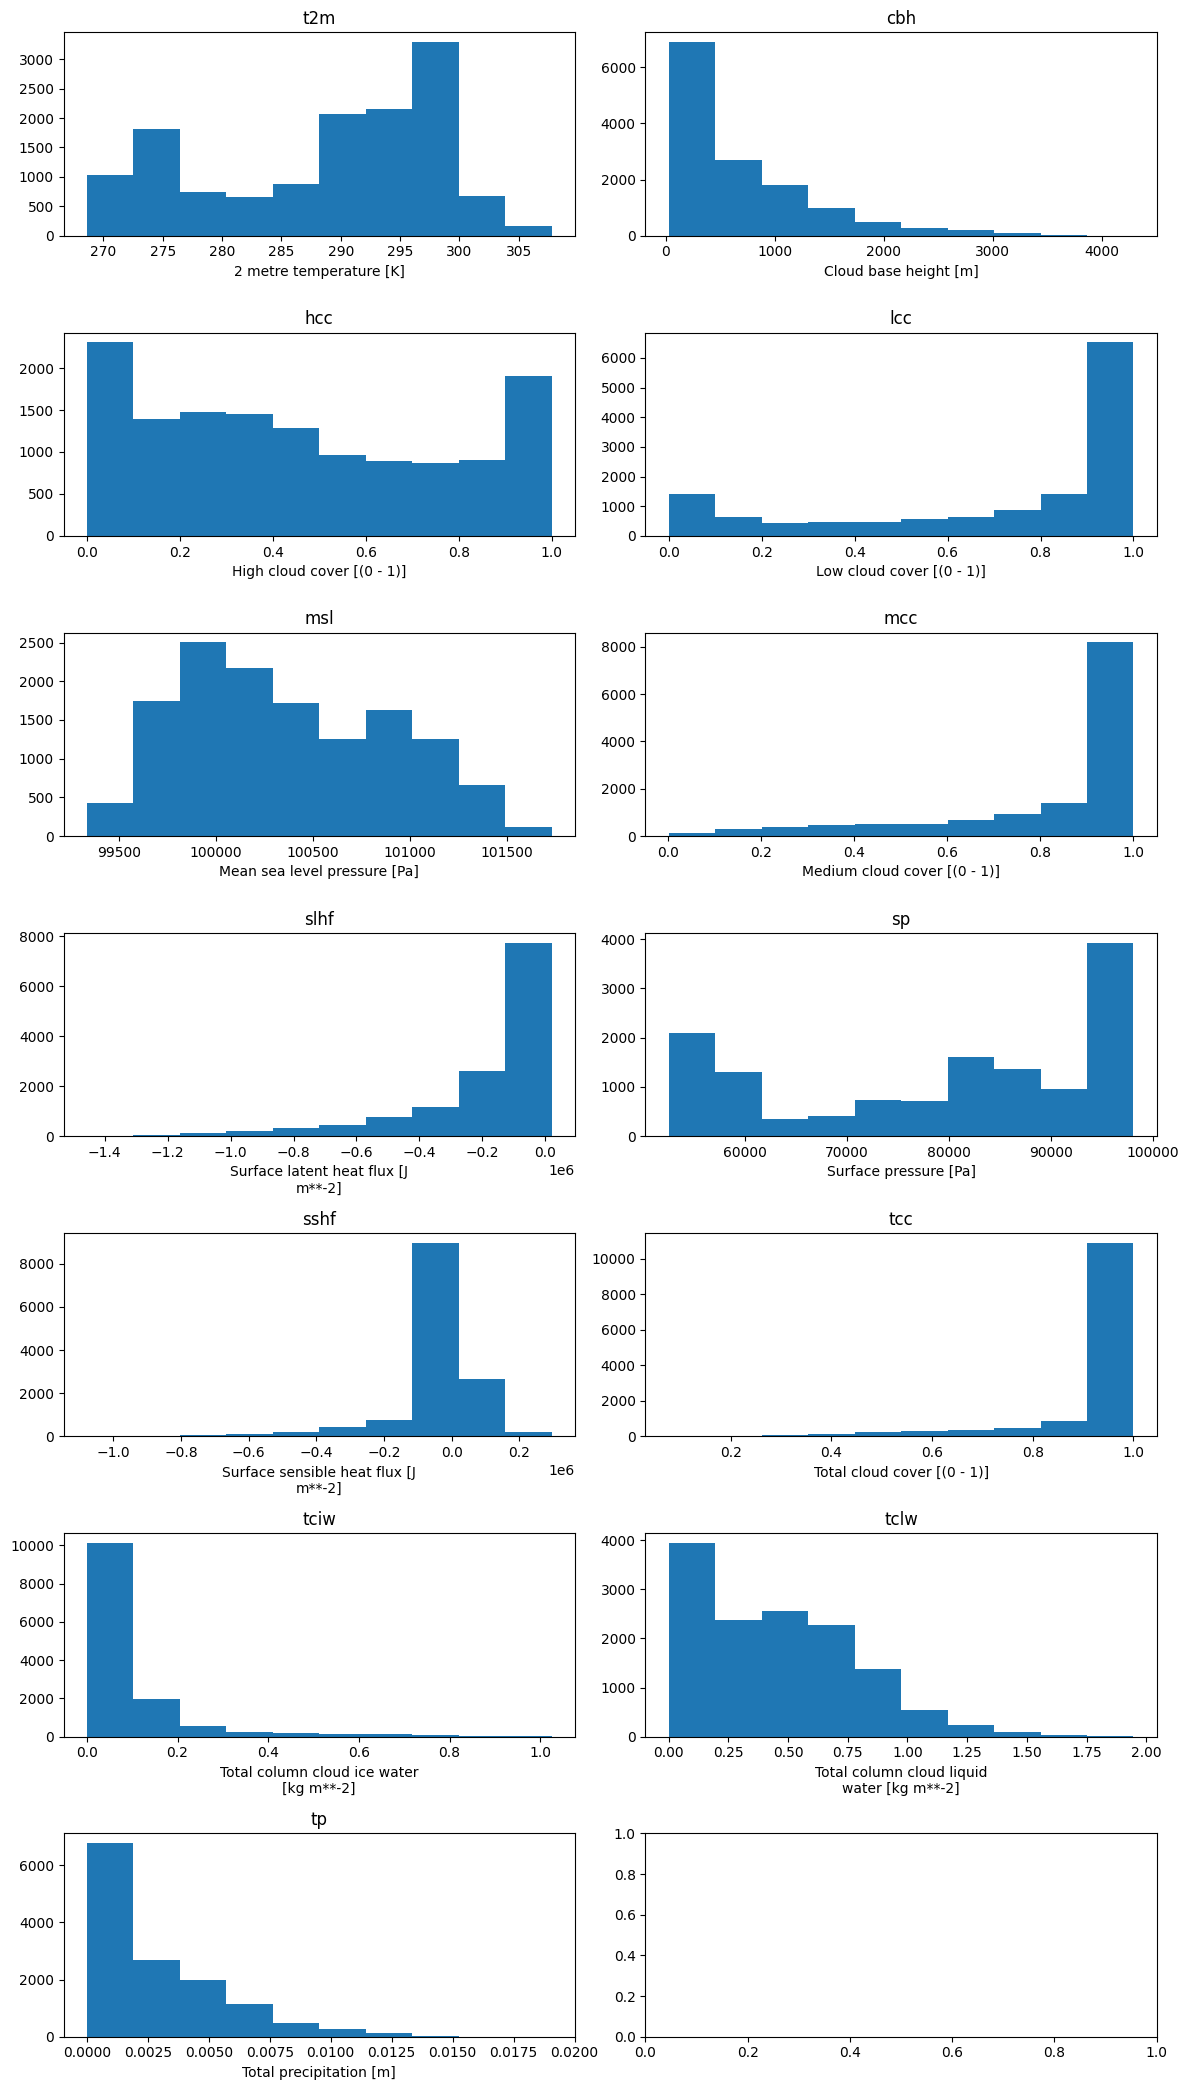

In [51]:
import matplotlib.pyplot as plt

data_vars = dataset.data_vars
num_variables = len(data_vars)

num_cols = 2 
num_rows = (num_variables + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, var_name in enumerate(data_vars):
    row = i // num_cols
    col = i % num_cols
    var_data = data_vars[var_name]
    var_data.plot(ax=axs[row, col])
    axs[row, col].set_title(var_name)

plt.tight_layout()
plt.show()

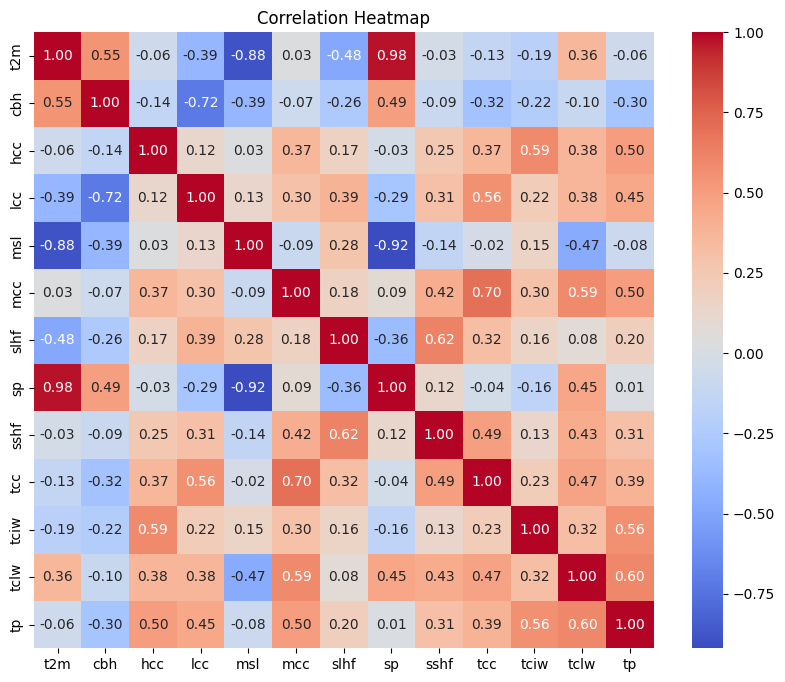

In [52]:
import seaborn as sns

correlation_matrix = dataset.to_dataframe().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
